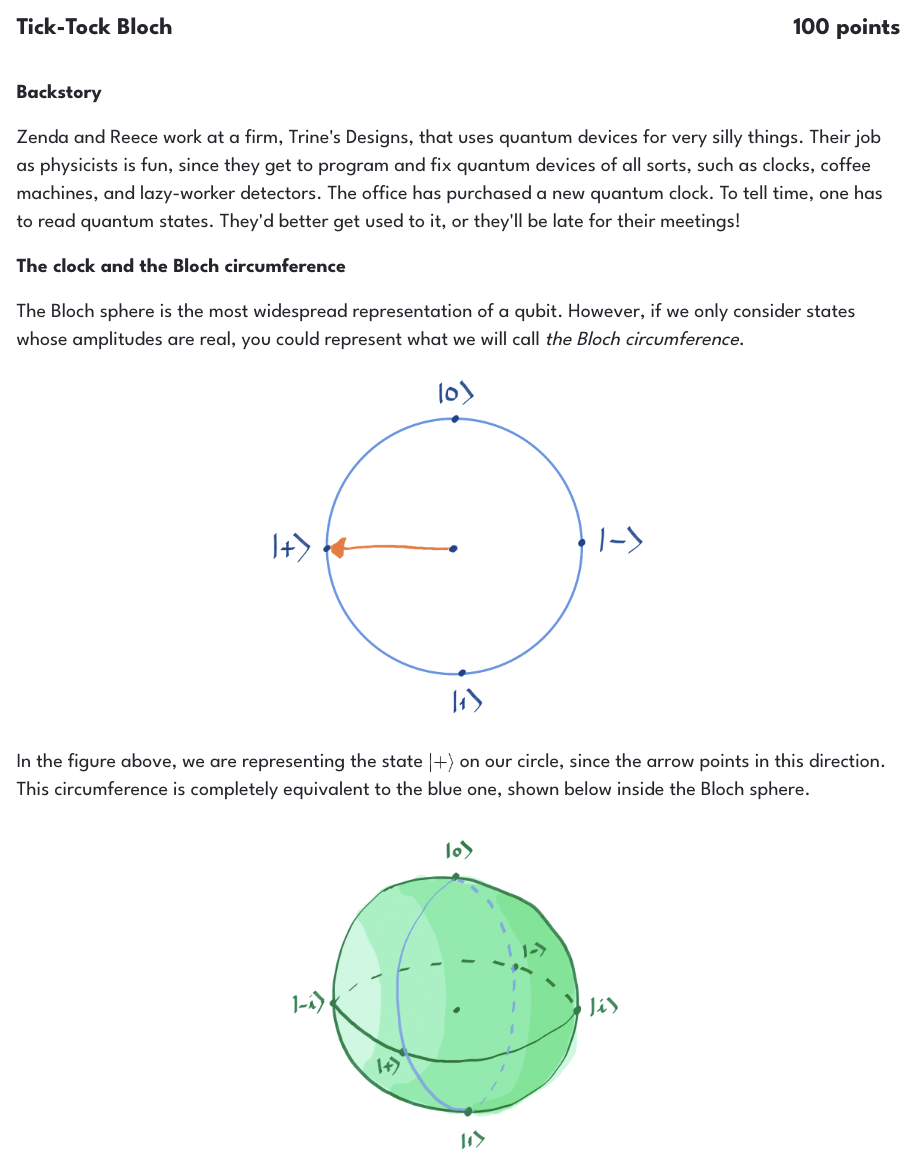

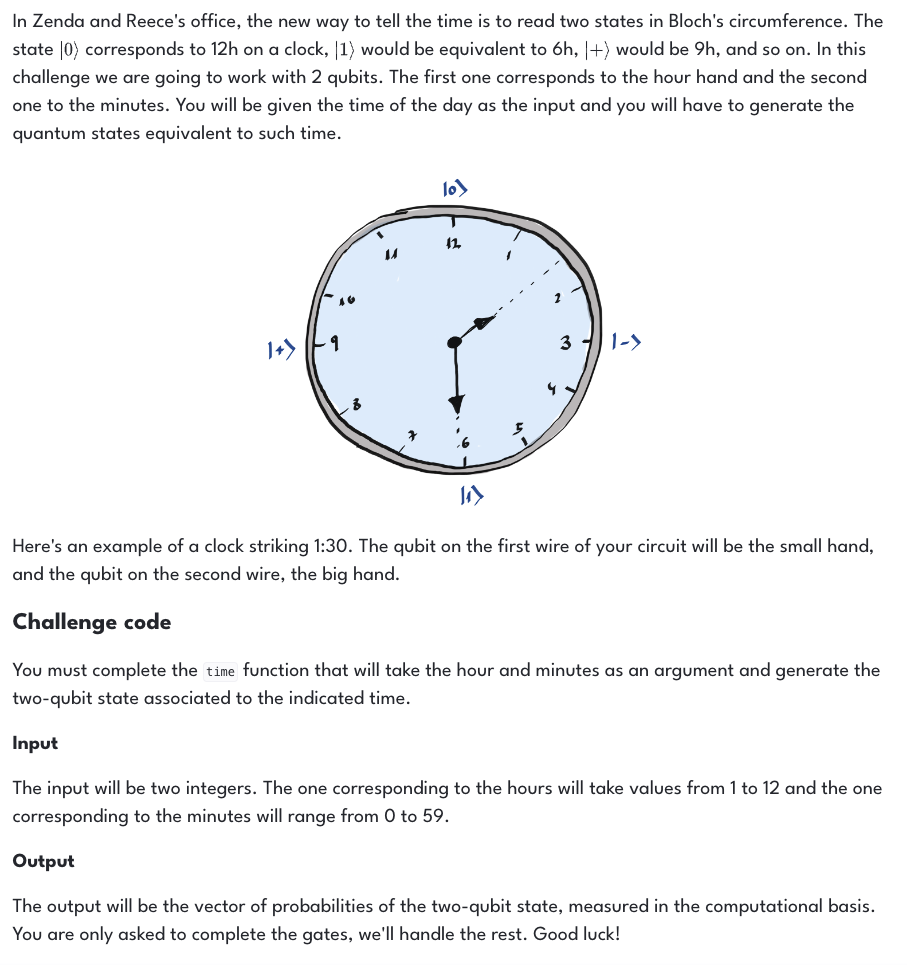

In [ ]:
import json
import pennylane as qml
import pennylane.numpy as np

In [ ]:
dev = qml.device("default.qubit", wires=["hour", "minute"])

In [ ]:
@qml.qnode(dev)
def time(hour, minute):
    """Generates the quantum state associated with the time passed as argument.

    Args:
        hour (int): Hour associated with the requested time
        minute (int): Minutes associated with the requested time

    Returns:
        (numpy.tensor): Probabilities associated with the state created.
    """
    # Put your code here #
    return qml.probs(wires=["hour", "minute"])

In [ ]:
# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    hour, minute = json.loads(test_case_input)
    state = [float(x) for x in time(hour, minute)]
    return str(state)

def check(solution_output, expected_output: str) -> None:

    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)

    assert np.allclose(
        solution_output, expected_output, atol=0.1
    ), "The solution does not seem to be correct."

In [ ]:
test_cases = [['[12, 0]', '[1.0, 0.0, 0.0, 0.0]'], ['[1, 30]', '[0.0, 0.85355339, 0.0, 1.46446609e-01]']]

In [ ]:
for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")